# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

weather_api_key

'0c20b8a0adf53dab0870275066bda791'

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 587


['yellowknife',
 'thompson',
 'bredasdorp',
 'leningradskiy',
 'saint-philippe',
 'albany',
 'avera',
 'nikolskoye',
 'souillac',
 'hithadhoo',
 'ottawa',
 'jamestown',
 'kuala terengganu',
 'arraial do cabo',
 'stromness',
 'busselton',
 'vaini',
 'upernavik',
 'kodiak',
 'bouillante',
 'bluff',
 'dunmore town',
 'arlit',
 'dikson',
 'menongue',
 'tabou',
 'mount gambier',
 'rawson',
 'chuy',
 'victoria',
 'dudinka',
 'rikitea',
 'punta arenas',
 'kirakira',
 'hermanus',
 'esperance',
 'iralaya',
 'ushuaia',
 'hobart',
 'mocambique',
 'piracanjuba',
 'bonavista',
 'barentsburg',
 'saldanha',
 'butaritari',
 'sistranda',
 'lavrentiya',
 'bargal',
 'cidreira',
 'heishan',
 'ketchikan',
 'labytnangi',
 'barrow',
 'funadhoo',
 'chokurdakh',
 'milingimbi',
 'nyurba',
 'miranda',
 'poum',
 'vaitupu',
 'tasiilaq',
 'sorland',
 'tsihombe',
 'pevek',
 'karaul',
 'tuktoyaktuk',
 'ust-kamchatsk',
 'macas',
 'kutum',
 'ust-ishim',
 'bengkulu',
 'port lincoln',
 'illoqqortoormiut',
 'sur',
 'galve

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
#Testing the API call

url = 'https://api.openweathermap.org/data/2.5/weather?'

city = 'zlitan'

city_url = url + 'q=' + city + '&appid='+ weather_api_key + '&units=metric'

weather_json = requests.get(city_url).json()

weather_json

{'coord': {'lon': 14.5687, 'lat': 32.4674},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 15.51,
  'feels_like': 14.19,
  'temp_min': 15.51,
  'temp_max': 15.51,
  'pressure': 1020,
  'humidity': 41,
  'sea_level': 1020,
  'grnd_level': 1018},
 'visibility': 10000,
 'wind': {'speed': 5.95, 'deg': 227, 'gust': 8.52},
 'clouds': {'all': 0},
 'dt': 1669080387,
 'sys': {'country': 'LY', 'sunrise': 1669095454, 'sunset': 1669132704},
 'timezone': 7200,
 'id': 2208485,
 'name': 'Zliten',
 'cod': 200}

In [4]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + 'q=' + city + '&appid='+ weather_api_key + '&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | leningradskiy
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | avera
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | souillac
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | ottawa
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | kuala terengganu
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | stromness
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | upernavik
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | bouillante
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 | dunmore town
Processing Record 

Processing Record 34 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 35 of Set 4 | almaznyy
Processing Record 36 of Set 4 | saint-joseph
Processing Record 37 of Set 4 | teguldet
Processing Record 38 of Set 4 | grand centre
City not found. Skipping...
Processing Record 39 of Set 4 | bambous virieux
Processing Record 40 of Set 4 | winfield
Processing Record 41 of Set 4 | kralendijk
Processing Record 42 of Set 4 | soyo
Processing Record 43 of Set 4 | pochutla
Processing Record 44 of Set 4 | vila velha
Processing Record 45 of Set 4 | taltal
Processing Record 46 of Set 4 | faanui
Processing Record 47 of Set 4 | granadilla de abona
Processing Record 48 of Set 4 | coihaique
Processing Record 49 of Set 4 | vila franca do campo
Processing Record 0 of Set 5 | daru
Processing Record 1 of Set 5 | kahului
Processing Record 2 of Set 5 | san vicente de canete
Processing Record 3 of Set 5 | kalachinsk
Processing Record 4 of Set 5 | safranbolu
Processing Record 5 of Set 5 | sulta

Processing Record 22 of Set 8 | aguimes
Processing Record 23 of Set 8 | zorritos
Processing Record 24 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 25 of Set 8 | basavakalyan
Processing Record 26 of Set 8 | acapulco
Processing Record 27 of Set 8 | samarai
Processing Record 28 of Set 8 | karasjok
Processing Record 29 of Set 8 | tawang
Processing Record 30 of Set 8 | hasaki
Processing Record 31 of Set 8 | acarau
Processing Record 32 of Set 8 | barguzin
Processing Record 33 of Set 8 | morant bay
Processing Record 34 of Set 8 | mudgee
Processing Record 35 of Set 8 | christchurch
Processing Record 36 of Set 8 | kologriv
Processing Record 37 of Set 8 | van wert
Processing Record 38 of Set 8 | kamenka
Processing Record 39 of Set 8 | villarrica
Processing Record 40 of Set 8 | kalaikunda
Processing Record 41 of Set 8 | deputatskiy
Processing Record 42 of Set 8 | inongo
Processing Record 43 of Set 8 | brooks
Processing Record 44 of Set 8 | erenhot
Processing Record 45 of Se

Processing Record 15 of Set 12 | college
Processing Record 16 of Set 12 | vanderhoof
Processing Record 17 of Set 12 | am timan
Processing Record 18 of Set 12 | vestmannaeyjar
Processing Record 19 of Set 12 | cherskiy
Processing Record 20 of Set 12 | teahupoo
Processing Record 21 of Set 12 | krasnoarmeysk
Processing Record 22 of Set 12 | opuwo
Processing Record 23 of Set 12 | lac du bonnet
Processing Record 24 of Set 12 | dingle
Processing Record 25 of Set 12 | kavieng
Processing Record 26 of Set 12 | luderitz
Processing Record 27 of Set 12 | gotsu
Processing Record 28 of Set 12 | corpus christi
Processing Record 29 of Set 12 | suleja
Processing Record 30 of Set 12 | mergui
City not found. Skipping...
Processing Record 31 of Set 12 | valparaiso
Processing Record 32 of Set 12 | kudahuvadhoo
Processing Record 33 of Set 12 | staryy nadym
Processing Record 34 of Set 12 | irbil
Processing Record 35 of Set 12 | mimongo
Processing Record 36 of Set 12 | sumbawa
City not found. Skipping...
-----

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          542
Lat           542
Lng           542
Max Temp      542
Humidity      542
Cloudiness    542
Wind Speed    542
Country       542
Date          542
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,-2.71,100,100,0.00,CA,1669080393
1,thompson,55.7435,-97.8558,-6.91,86,100,3.60,CA,1669080393
2,bredasdorp,-34.5322,20.0403,15.15,75,92,0.62,ZA,1669080394
3,leningradskiy,69.3833,178.4167,-24.34,90,97,6.38,RU,1669080234
4,saint-philippe,-21.3585,55.7679,21.77,84,53,1.71,RE,1669080394


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-2.71,100,100,0.00,CA,1669080393
1,thompson,55.7435,-97.8558,-6.91,86,100,3.60,CA,1669080393
2,bredasdorp,-34.5322,20.0403,15.15,75,92,0.62,ZA,1669080394
3,leningradskiy,69.3833,178.4167,-24.34,90,97,6.38,RU,1669080234
4,saint-philippe,-21.3585,55.7679,21.77,84,53,1.71,RE,1669080394


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

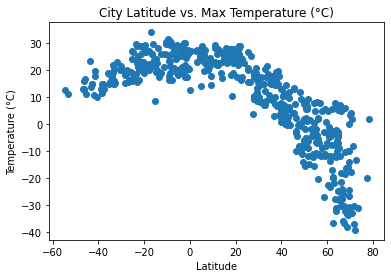

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

lat_temp_scatter = plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')
plt.title('City Latitude vs. Max Temperature (°C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

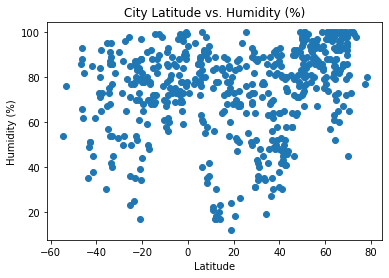

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

lat_temp_scatter = plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

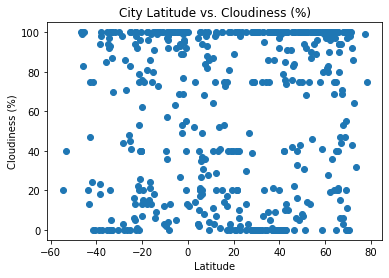

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

lat_temp_scatter = plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (%)')
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

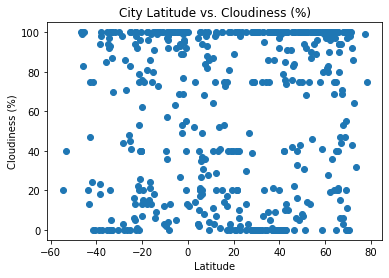

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

lat_temp_scatter = plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def reg_function(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    
    print(f'The r-value is {rvalue}')
    print(f'Regression equation: {line_eq}')

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-2.71,100,100,0.00,CA,1669080393
1,thompson,55.7435,-97.8558,-6.91,86,100,3.60,CA,1669080393
3,leningradskiy,69.3833,178.4167,-24.34,90,97,6.38,RU,1669080234
5,albany,42.6001,-73.9662,3.18,47,76,3.62,US,1669080395
6,avera,33.1940,-82.5271,8.73,35,95,2.37,US,1669080395


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bredasdorp,-34.5322,20.0403,15.15,75,92,0.62,ZA,1669080394
4,saint-philippe,-21.3585,55.7679,21.77,84,53,1.71,RE,1669080394
8,souillac,-20.5167,57.5167,21.21,88,40,2.57,MU,1669080396
9,hithadhoo,-0.6000,73.0833,26.81,78,13,4.59,MV,1669080397
13,arraial do cabo,-22.9661,-42.0278,23.20,87,13,9.73,BR,1669080398


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8606594275673883
Regression equation: y = -0.71x + 34.02


Text(0.5, 1.0, 'City Latitude vs. Max Temperature (°C)')

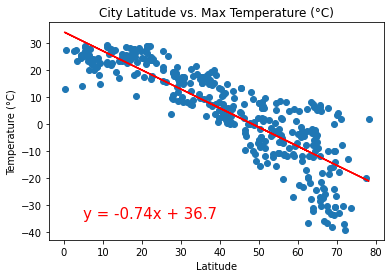

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

reg_function(x_values, y_values)
plt.annotate('y = -0.74x + 36.7', (5,-35), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')
plt.title('City Latitude vs. Max Temperature (°C)')

In the northern hemisphere, an increase of 1° of latitude is associated with a 0.74°C reduction in expected max temperature.

The r-value is 0.6099749895115003
Regression equation: y = 0.24x + 26.29


Text(0.5, 1.0, 'City Latitude vs. Max Temperature (°C)')

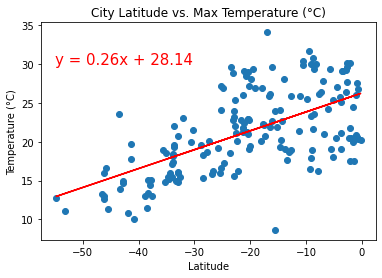

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

reg_function(x_values, y_values)
plt.annotate('y = 0.26x + 28.14', (-55,30), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')
plt.title('City Latitude vs. Max Temperature (°C)')

In the southern hemisphere, an increase of 1° of latitude is associated with a 0.26°C increase in expected max temperature.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.393454006853217
Regression equation: y = 0.41x + 58.35


Text(0.5, 1.0, 'City Latitude vs. Humidity')

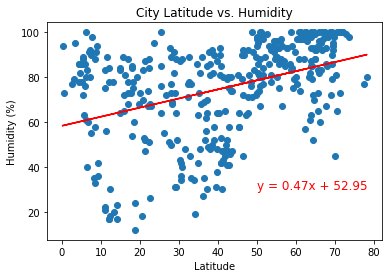

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

reg_function(x_values, y_values)
plt.annotate('y = 0.47x + 52.95 ', (50,30), fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')

In the northern hemisphere, an increase of 1° of latitude is associated with a 0.47% increase in humidity.

The r-value is 0.26958623532001125
Regression equation: y = 0.35x + 80.53


Text(0.5, 1.0, 'City Latitude vs. Humidity')

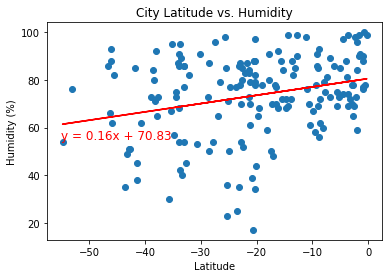

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

reg_function(x_values, y_values)
plt.annotate('y = 0.16x + 70.83', (-55,55), fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')

In the southern hemisphere, an increase of 1° of latitude is associated with a 0.16% increase in humidity.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.29121228727713994
Regression equation: y = 0.58x + 36.9


Text(0.5, 1.0, 'City Latitude vs. Cloudiness')

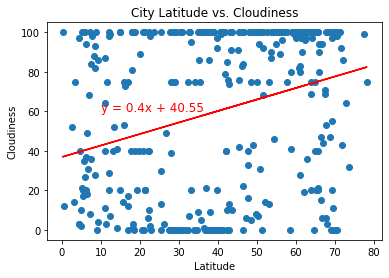

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

reg_function(x_values, y_values)
plt.annotate('y = 0.4x + 40.55 ', (10,60), fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness')

In the northern hemisphere, an increase of 1° of latitude is associated with a 0.4% increase in cloudiness.

The r-value is 0.17608193979510744
Regression equation: y = 0.51x + 71.81


Text(0.5, 1.0, 'City Latitude vs. Cloudiness')

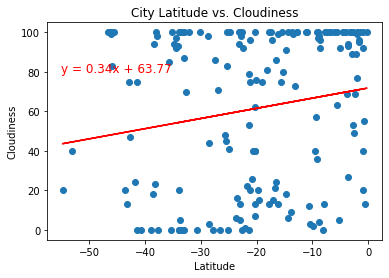

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

reg_function(x_values, y_values)
plt.annotate('y = 0.34x + 63.77', (-55,80), fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness')

In the southern hemisphere, an increase of 1° of latitude is associated with a 0.34% increase in cloudiness.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.03432324727095474
Regression equation: y = 0.01x + 3.48


Text(0.5, 1.0, 'City Latitude vs. Wind Speed')

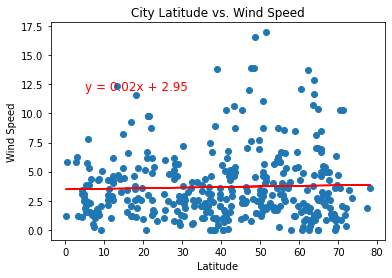

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

reg_function(x_values, y_values)
plt.annotate('y = 0.02x + 2.95', (5,12), fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed')

In the northern hemisphere, an increase of 1° of latitude is associated with a 0.02 m/s increase in wind speed.

The r-value is -0.3749564243731228
Regression equation: y = -0.07x + 2.09


Text(0.5, 1.0, 'City Latitude vs. Wind Speed')

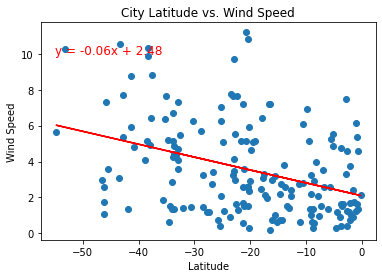

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

reg_function(x_values, y_values)
plt.annotate('y = -0.06x + 2.48', (-55,10), fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed')

In the southern hemisphere, an increase of 1° of latitude is associated with a 0.06 m/s reduction in wind speed.

**Discussion about the linear relationship:** YOUR RESPONSE HERE